[![](./media/Db2_header_3.png)](https://www.ibm.com/demos/collection/db2-database/)
<a id="top">

# Installing Db2 on OpenShift with MPP

This lab will take the user through the steps required to  deploy Db2 on an OpenShift Image in Db2 MPP Topography. This is excellent for Data Warehousing and ODS deployments. The requirement for this lab is that you have completed the installing Db2 on OpenShift lab previous to running this lab, as it creates the Db2 project and sets up the required environment leading up to the installation of Db2.

**Note**: Click on the next cell and press **Shift-Return** to refresh all of the examples in this notebook.

In [ ]:
%run refresh.ipynb

### How to Copy Code and Examples
Throughout this lab there are code samples that need to be copied and modified in a text editor. Any commands that need to be executed from a command line are found in grey boxes (an example is found below) has been designed to be easily copied.

In [29]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black;" >
<p style=" color:white ;font-family:courier;background-Color:black"
""<pre id=112 onmousedown="window.clipline(112)" onmouseup="window.reset(112)  ">
Sample commands are found in cells like this.
</pre>
</div>


The entire contents of the text in the cell will be automatically copied when you click on the cell. The color of the background will change color briefly to indicate that the copy has completed. To paste commands into a terminal window, use the key combination **Control-Shift-v**. 

It may be easier to keep a terminal window on top of the Jupyter notebook when running these commands. When you have a terminal window displayed, right click on the title bar and select `Always on Top` to keep the screen visible during the duration of the lab.

### Open a Command Line
click the below button to get started !

In [30]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Command Line",button_style='primary')
output = widgets.Output()
display(button, output)
def on_button_clicked(b):
        ! gnome-terminal --window-with-profile=db2pot --working-directory=/home/db2pot
button.on_click(on_button_clicked)

Button(button_style='primary', description='Command Line', style=ButtonStyle())

Output()

## Passwords for this lab
### Operating system login & Web App Login
        UserID: db2pot
        password: 123qwe123

### Openshift Login 
        UserID: admin
        password: redhat

### Db2 Login
        UserID: db2inst1
        password: db2Inst1

## Setup Environment for MPP

First we have to remove our OLTP environment. Please follw the steps in order otherwise you may create issues with your OpenShift cluster.

Login as admin using password "redhat" using the below command and complete the following steps

In [31]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=2.1 onmousedown="window.clipline(2.1)" onmouseup="window.reset(2.1)">
oc login -u admin

In [32]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=2 onmousedown="window.clipline(2)" onmouseup="window.reset(2)">
helm delete db2u --purge

Monitor the Db2 pod deletion until there are no pods left running for Db2

In [33]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=2.2 onmousedown="window.clipline(2.2)" onmouseup="window.reset(2.2)">
oc get pods

delete the Db Persistent volume and Claim and then the db2vol directory we created in the previous lab

In [34]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=2.4 onmousedown="window.clipline(2.4)" onmouseup="window.reset(2.4)">
oc delete pvc db2pvc

In [35]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=2.5 onmousedown="window.clipline(2.5)" onmouseup="window.reset(2.5)">
oc delete pv db2-vol

In [36]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=2.3 onmousedown="window.clipline(2.3)" onmouseup="window.reset(2.3)">
sudo rm -rf /home/db2pot/db2vol1

### Creating the DB2 Environment for MPP

The second step will be to create the directory with the right permissions for our Db2s persistent volume and volum claim to be built.
Db2 Supports host path flie systems including local and attached storage as well as Cloud or shared storage such as NFS, PortWorks etc.

In [37]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=3 onmousedown="window.clipline(3)" onmouseup=" window.reset(3)">
mkdir -p /home/db2pot/db2vol1

In [38]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=4 onmousedown="window.clipline(4)" onmouseup="window.reset(4)">
chmod 777 -R /home/db2pot/db2vol1

In [39]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=5 onmousedown="window.clipline(5)" onmouseup="window.reset(5)">
sudo chgrp root -R /home/db2pot/db2vol1


In [40]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black;" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=6.1 onmousedown="window.clipline(6.1)" onmouseup="  window.reset(6.1)">
sudo restorecon -Rv /home/db2pot/db2vol1

In [41]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black;" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=7 onmousedown="window.clipline(7)" onmouseup="window.reset(7)">
sudo semanage fcontext -a -t container_file_t "/home/db2pot/db2vol1(/.*)?"

### Create the Db2 Persistent Volume and Volume Claim

We can now re-use the file to create the Persistent Volume and Claim we used in the previous lab.

In [42]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=17 onmousedown="window.clipline(17)" onmouseup=" window.reset(17)">
oc apply -f db2vol.yaml # see below

### Now Lets Install Db2 !

First we are going to move to the db2 deployment directory then run the Db2 install with the required parameters for a small install

In [43]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=18 onmousedown="window.clipline(18)" onmouseup=" window.reset(18)">
cd /home/db2pot/Db2/deployment

In [44]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=19 onmousedown="window.clipline(19)" onmouseup="window.reset(19)">
./db2wh_install --db-type db2wh --namespace db2 --release-name db2u --existing-pvc db2pvc --tiller-namespace tiller --db-partitions 4 --db-nodes 1

The above installs a Db2 database with configurations for OLTP, in our Namespace / Project Db2, using our defined Db2 Persistent volume claim and sets its cpu limit to 2 cores and a memory allocation of 3gb

### Now we are going to monitor the deployments Progress

First of all we are going to get the status of the pods, you will have to run this command multiple times as it will take a few minutes for the install to download the containers and install them in your project.

In [45]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=20 onmousedown="window.clipline(20)" onmouseup="window.reset(20)">
oc get pods

When your installation is complete you should see the following status with the db2u-db2u-0 pod status at Running and the ready status as 1/1

If you want to just get incramental updates of changes to the pods status you can try running "oc get pods -w" this ocmmand will give you the current status at the time of running and any incramental chsanges in status

## Monitoring Activities from the Openshift Console
You can get an overview of the activities within the cluster by using the Openshift dashboard.

Click on here and login as user:admin pwd:redhat https://localhost:8443/login

Once in the console, Navigate to the project Db2, click on applications then select pods to view pod status and browse from there.

[![](./media/Openshift.png)](https://localhost:8443/login)
<a id="top">

## Finding our what address to connect to Db2 on

lets find out the ports that we can connect to db2, first run the following command

In [46]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=21 onmousedown="window.clipline(21)" onmouseup="  window.reset(21)">
oc get svc
</div>

In [ ]:
NAME                 TYPE        CLUSTER-IP       EXTERNAL-IP   PORT(S)                                   AGE
db2u-db2u            ClusterIP   172.30.96.174    <none>        50000/TCP,50001/TCP,25000/TCP,25001/TCP,…  2m
db2u-db2u-engn-svc   NodePort    172.30.169.115   <none>        50000:31020/TCP,50001:31578/TCP            2m
db2u-db2u-internal   ClusterIP   None             <none>        50000/TCP,9443/TCP                         2m
db2u-db2u-ldap       NodePort    172.30.122.233   <none>        389:30154/TCP                              2m
db2u-etcd            ClusterIP   None             <none>        2380/TCP,2379/TCP                          2m


 Db2 exposes its service externally via the db2u-db2u-engn-svc service. In this case, 31020 is the non-SSL port Db2 will be listening on, and 31578 is the port that will support SSL connectivity. They are mapped to the db2u-db2u-0 50000/50001 ports that Db2 operates on.

To get your IP address for your server for external communication, use the following (if you are running on VMware):

In [47]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=22 onmousedown="window.clipline(22)" onmouseup=" window.reset(22)">
ip addr show | grep 'scope global noprefixroute dynamic'

In this example this is what it shows, you can use the inet address to connect to Db2.

In [ ]:
result: inet 192.168.154.132/24 brd 192.168.154.255 scope global noprefixroute dynamic ens33


## Lets Connect !

In [59]:
%run db2.ipynb

Db2 Extensions Loaded.


In [70]:
%sql connect to bludb user db2inst1 using db2inst1 host <host IP> port <external port>

Connection successful.


If the connection is not successful, it may be due to Db2 not having started completely. You may need to wait for a few minutes for Db2 to start accepting connections. Once you do have a connection, you need to add some sample data to the database. The BLUDB database does not have the sample tables in it, so issue the following command to populate the EMPLOYEE and DEPARTMENT tables.

Note if you run TOP in your command window, as we are running inside the Openshift node you will see the db2sycs processes running. 1 per data partition deployed.

In [71]:
%sql -sampledata

Sample tables [EMPLOYEE, DEPARTMENT] created.


At this point you can try various SQL commands since we have established a connection to Db2.

In [72]:
%sql -grid SELECT * FROM EMPLOYEE

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

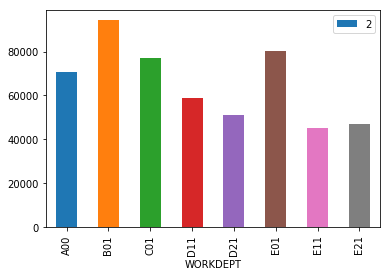

In [68]:
%sql -bar SELECT WORKDEPT, AVG(SALARY) FROM EMPLOYEE GROUP BY WORKDEPT

## Monitoring Activities
You can get an overview of the activities within the cluster by using the Openshift Dashboard

Click on here and login as user:admin pwd:redhat https://localhost:8443/login

## Simulating a Db2 Crash
You can simulate a crash in Kubernetes by deleting the Db2 pod. When you kill the pod, Kubernetes will restart the pod automatically for you. The first command will delete the Db2 pod, while the next command will watch the systems as the pod is dropped and recreated. To watch this process work, issue the first command in one command window and the second in another. 

In [48]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=23 onmousedown="window.clipline(23)" onmouseup="window.reset(23)">
oc delete pod db2u-db2u-0

Run the following command in the second window to watch the recovery occur.

In [49]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=23.1 onmousedown="window.clipline(23.1)" onmouseup="window.reset(23.1)">
oc get pods -w

Keep this status window so you can watch the delete step in the next section.

## Delete Db2 Pods
We can delete the Db2 pods by using Helm. This will properly remove Db2 since you can see that just deleting the pod will not work!

In [50]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=24 onmousedown="window.clipline(24)" onmouseup="window.reset(24)">
helm delete db2u --purge

Check on the status of the purge.

In [51]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=24.1 onmousedown="window.clipline(24.1)" onmouseup="window.reset(24.1)">
oc get pods

## Restart Db2 Install (It's much faster!)
Since we still have the Db2 images in the local Docker repository, and the persistent volume is still available, the recreation of Db2 pods is extremely quick.

In [52]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=25 onmousedown="window.clipline(25)" onmouseup=" window.reset(25)">
cd home/db2pot/Db2/deployment

In [53]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
""<pre id=26 onmousedown="window.clipline(26)" onmouseup="  window.reset(26)">
./db2wh_install --db-type db2wh --namespace db2 --release-name db2u --existing-pvc db2pvc --tiller-namespace tiller --db-partitions 4 --db-nodes 1

Check its progress to see how long this deployment takes.

In [54]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=27 onmousedown="window.clipline(27)" onmouseup=" window.reset(27)">
oc get pods

## Other Interesting Stuff !

There are a range of different commands you can explore to learn about your Db2 Environment.

View the logs of the Db2 pod (or exchange Db2 pod name for any other).

In [1]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=30 onmousedown="window.clipline(30)" onmouseup=" window.reset(30)">
oc logs db2u-db2u-0

Describe the current Db2 pod status.

In [4]:
%%html
<div style="margin-left: 35px; border-style: solid; border-width: 1px; padding: 10px;background-Color:black" >
<p style=" color:white ;font-family:courier;background-Color:black"
<pre id=31 onmousedown="window.clipline(31)" onmouseup=" window.reset(31)">
oc describe pod db2u-db2u-0

[![](./media/db2_dte_footer.png)](https://www.ibm.com/demos/collection/db2-database/)
<a id="top">

#### Credits: IBM 2020, Phil Downey [phil.downey1@ibm.com], George Baklarz [baklarz@ca.ibm.com]